# Plotting various graphs for the methods plot in the paper
the methods figure is created in the powerpoint file methods figure.pptx. Here I am creating some graphics to be used in that plot

In [1]:
# Import Libraries
# Data
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import geopandas as gpd
import random

import re
from copy import deepcopy
#from tqdm import tqdm
import tqdm.notebook as tq

#Viz
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(font='Helvetica') # Futura? Calibri Light? 
sns.set_style("white")
sns.set_theme(style='ticks')
sns.set_context('talk')

c:\Users\Keagan Rankin\anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
from fig_package.fig_sample.house_clean_sample import *
from fig_package.fig_sample.road_clean_sample import *

Import results

In [3]:
#prov = ['on']
prov = ['nl','ns','nb','pei','qc','on','mb','sk','ab','bc','nwt','yk']

p_samples = {}
for p in prov:
    p_samples[p] = pd.read_csv('C:/Users/Keagan Rankin/OneDrive - University of Toronto/Saxe - Rankin/Project 2. Housing Projections/FIG_Canada/mc_samples/'+p+'/inf_mc_samples_'+p+'.csv')

In [4]:
p_samples['on'].groupby('DAUID').median()

,house_ghg_pp,road_ghg_pp,water_inf_ghg_pp
DAUID,,,
35010155,28067.827180,23132.022884,1672.656799
35010156,28470.317446,16173.539400,1681.263553
35010157,28190.865088,15442.667255,1692.312565
35010158,28222.790389,10925.127778,180.755825
35010159,25243.556316,11304.720355,68.201322
...,...,...,...
35600396,23655.374469,1681.355554,345.955955
35600397,26030.846406,2053.899405,224.130363
35600402,28762.501958,285418.222753,4146.523714


Import provincial DA info

In [5]:
all_prov_reg_info = pd.read_csv('C:/Users/Keagan Rankin/OneDrive - University of Toronto/Saxe - Rankin/Project 2. Housing Projections/FIG_Canada/results/canada_da_info_with_emissions.csv')
all_prov_reg_info['tot'] = all_prov_reg_info[['flat_duplex', 'lowrise_apartment', 'mid_high_rise','rowhouse', 'semi_detached','single_detached']].sum(axis=1)
all_prov_reg_info['sf_percentage'] = all_prov_reg_info['single_detached']/all_prov_reg_info['tot']

In [6]:
all_prov_reg_info.head()

,DAUID,LANDAREA,PRUID,geometry,avg_household_size,flat_duplex,lowrise_apartment,mid_high_rise,mobile,other,...,lowrise_per_person,midhigh_per_person,semi_per_person,single_per_person,missing_middle_per_person,sf_percentage,house_ghg_pp,road_ghg_pp,water_inf_ghg_pp,tot
0,10010165,0.3817,10,POLYGON ((8978199.942857184 2146681.8885714635...,2.3,105.0,5.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.210000,0.220000,0.488372,21847.296204,1810.835965,372.509491,215.0
1,10010166,0.0954,10,POLYGON ((8978655.237142898 2146599.6542857476...,2.3,70.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.235294,0.205882,0.533333,23266.023940,1077.518353,268.269979,150.0
2,10010167,0.1265,10,"POLYGON ((8978582.4771429 2146647.180000033, 8...",2.2,110.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.184275,0.270270,0.405405,22113.372763,1053.595985,210.453065,185.0
3,10010168,0.1911,10,"POLYGON ((8978846.74857147 2147522.748571463, ...",2.1,135.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.210325,0.258126,0.448980,23435.224346,1135.418890,286.205047,245.0
4,10010169,0.0662,10,"POLYGON ((8978347.594285756 2146972.785714321,...",2.3,70.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.175439,0.245614,0.416667,20631.410307,895.746718,211.202747,120.0


In [7]:
all_prov_reg_info['geometry'].iloc[0]
all_prov_reg_info['geometry'] = gpd.GeoSeries.from_wkt(all_prov_reg_info['geometry'])

In [8]:
all_prov_geo = gpd.GeoDataFrame(all_prov_reg_info, geometry='geometry', crs='EPSG:3347')

<AxesSubplot:>

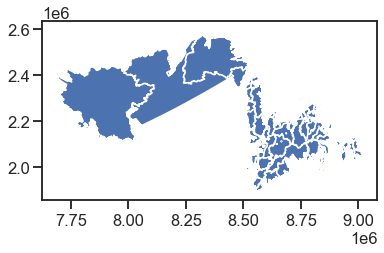

In [9]:
all_prov_geo[all_prov_geo['DAUID'].astype(str).str.startswith('10')].plot()

In [115]:
house_sampler = HouseSample(master='C:/Users/Keagan Rankin/')
house_sampler.province_name = 'newfoundland'
foo = house_sampler.get_prov_da(prov_name=house_sampler.province_name,
                            shapefile_path=house_sampler.shapefile_path,
                            census_data_path=house_sampler.path + 'da_census_data_reduced/' + house_sampler.prov_da_file_map[house_sampler.province_name]
                            )

[I] Reading DA Shapefile...
[I] Importing census data...
[I] Merging data...
[I] Adding useful columns...
[C] Returning... Complete.


In [118]:
foo.crs

<Derived Projected CRS: EPSG:3347>
Name: NAD83 / Statistics Canada Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Statistics Canada Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Import geodatasets for plotting

In [66]:
road_path = 'C:/Users/Keagan Rankin/OneDrive - University of Toronto/Saxe - Rankin/Project 2. Housing Projections/FIG_Canada/data/roads/nrn_rrn_pe_SHAPE/NRN_RRN_PE_20_1_SHAPE/NRN_PE_20_1_SHAPE_en/NRN_PE_20_1_ROADSEG.shp'
road_shp_ont = gpd.read_file(road_path)

In [67]:
road_shp_ont

,ACCURACY,ROADCLASS,NID,NBRLANES,PAVSURF,PAVSTATUS,ROADJURIS,STRUCTID,STRUCTTYPE,UNPAVSURF,geometry
0,5,Arterial,3e5ad5a080994810af5dde31c65aafd4,2,Flexible,Paved,Charlottetown,None,None,None,"LINESTRING (-63.11416 46.24111, -63.11434 46.2..."
1,5,Arterial,2c1522505c7e4c35b5456a94b3a144f1,2,Flexible,Paved,Charlottetown,None,None,None,"LINESTRING (-63.11427 46.24049, -63.11417 46.2..."
2,3,Arterial,e5135ac4bedd4e0a92ba0410c433b72d,2,Flexible,Paved,Province,None,None,None,"LINESTRING (-63.18677 46.29942, -63.18734 46.2..."
3,3,Ramp,8ddcb76d95444aed90fa416485c4b870,1,Flexible,Paved,Province,None,None,None,"LINESTRING (-63.11212 46.26550, -63.11209 46.2..."
4,3,Local / Street,c865995b077c4b3891118631bc3003ba,2,Flexible,Paved,Province,None,None,None,"LINESTRING (-63.14275 46.27455, -63.14282 46.2..."
...,...,...,...,...,...,...,...,...,...,...,...
18487,5,Local / Strata,f3440cf7c6a64248b6f2702d6db52f9a,2,Flexible,Paved,Private,None,None,None,"LINESTRING (-63.13721 46.24338, -63.13684 46.2..."
18488,3,Collector,fdcad3c5875b43bc912152ca1d0d6024,2,Flexible,Paved,Province,None,None,None,"LINESTRING (-63.31473 46.42568, -63.31484 46.4..."
18489,3,Collector,b267f10e0d8e40a2b6f66d5ebfba82e8,2,Flexible,Paved,Province,None,None,None,"LINESTRING (-64.18019 46.92557, -64.17974 46.9..."
18490,3,Local / Street,bf1fe1adb3ad42dfbb9d6b70d09fb118,2,Flexible,Paved,Province,None,None,None,"LINESTRING (-62.90882 46.05592, -62.90899 46.0..."


Plots

In [7]:
ont_da['DAUID'] = ont_da['DAUID'].astype(int)
ghg_map = p_samples['on'].groupby('DAUID').median().join(ont_da[['DAUID','pop_2021', 'LANDAREA', 'pop_km2', 'tot_pd_check_count', 'geometry']].set_index('DAUID'), on='DAUID')
ghg_map

,house_ghg_pp,road_ghg_pp,water_inf_ghg_pp,pop_2021,LANDAREA,pop_km2,tot_pd_check_count,geometry
DAUID,,,,,,,,
35010155,28067.827180,23132.022884,1672.656799,457.0,65.4855,6.978644,190.0,"POLYGON ((7558590.434 1210287.346, 7558004.229..."
35010156,28470.317446,16173.539400,1681.263553,449.0,53.6587,8.367702,195.0,"POLYGON ((7564496.469 1214012.634, 7564523.649..."
35010157,28190.865088,15442.667255,1692.312565,472.0,66.4855,7.099292,205.0,"POLYGON ((7554559.837 1208436.143, 7554964.286..."
35010158,28222.790389,10925.127778,180.755825,495.0,39.0001,12.692275,205.0,"POLYGON ((7568683.397 1212570.343, 7568684.897..."
35010159,25243.556316,11304.720355,68.201322,533.0,36.0102,14.801362,210.0,"POLYGON ((7569410.889 1201398.920, 7569313.789..."
...,...,...,...,...,...,...,...,...
35600396,23655.374469,1681.355554,345.955955,533.0,0.3775,1411.920530,210.0,"POLYGON ((6069461.823 1659157.254, 6069453.514..."
35600397,26030.846406,2053.899405,224.130363,437.0,0.2300,1900.000000,180.0,"POLYGON ((6069942.457 1659002.940, 6069774.831..."
35600402,28762.501958,285418.222753,4146.523714,455.0,12617.5947,0.036061,200.0,"MULTIPOLYGON (((6049050.823 1479001.463, 60490..."


In [13]:
#ghg_map = ghg_map.groupby('DAUID').median()
ghg_map_gpd = gpd.GeoDataFrame(ghg_map.reset_index(), geometry='geometry').reset_index(drop=True).to_crs(4269)

In [14]:
ghg_map_gpd

,DAUID,house_ghg_pp,road_ghg_pp,water_inf_ghg_pp,pop_2021,LANDAREA,pop_km2,tot_pd_check_count,geometry
0,35010155,28067.827180,23132.022884,1672.656799,457.0,65.4855,6.978644,190.0,"POLYGON ((-74.57204 45.38831, -74.58128 45.384..."
1,35010156,28470.317446,16173.539400,1681.263553,449.0,53.6587,8.367702,195.0,"POLYGON ((-74.48790 45.40601, -74.48758 45.405..."
2,35010157,28190.865088,15442.667255,1692.312565,472.0,66.4855,7.099292,205.0,"POLYGON ((-74.62710 45.38208, -74.62356 45.377..."
3,35010158,28222.790389,10925.127778,180.755825,495.0,39.0001,12.692275,205.0,"POLYGON ((-74.44210 45.38368, -74.44228 45.383..."
4,35010159,25243.556316,11304.720355,68.201322,533.0,36.0102,14.801362,210.0,"POLYGON ((-74.47123 45.28667, -74.47294 45.285..."
...,...,...,...,...,...,...,...,...,...
20135,35600396,23655.374469,1681.355554,345.955955,533.0,0.3775,1411.920530,210.0,"POLYGON ((-93.74293 51.05988, -93.74296 51.057..."
20136,35600397,26030.846406,2053.899405,224.130363,437.0,0.2300,1900.000000,180.0,"POLYGON ((-93.73597 51.05861, -93.73831 51.057..."
20137,35600402,28762.501958,285418.222753,4146.523714,455.0,12617.5947,0.036061,200.0,"MULTIPOLYGON (((-93.95127 49.42781, -93.95127 ..."
20138,35600408,29785.662589,62536.476349,1134.704895,727.0,1215.8036,0.597958,330.0,"MULTIPOLYGON (((-94.13239 49.36514, -94.13242 ..."


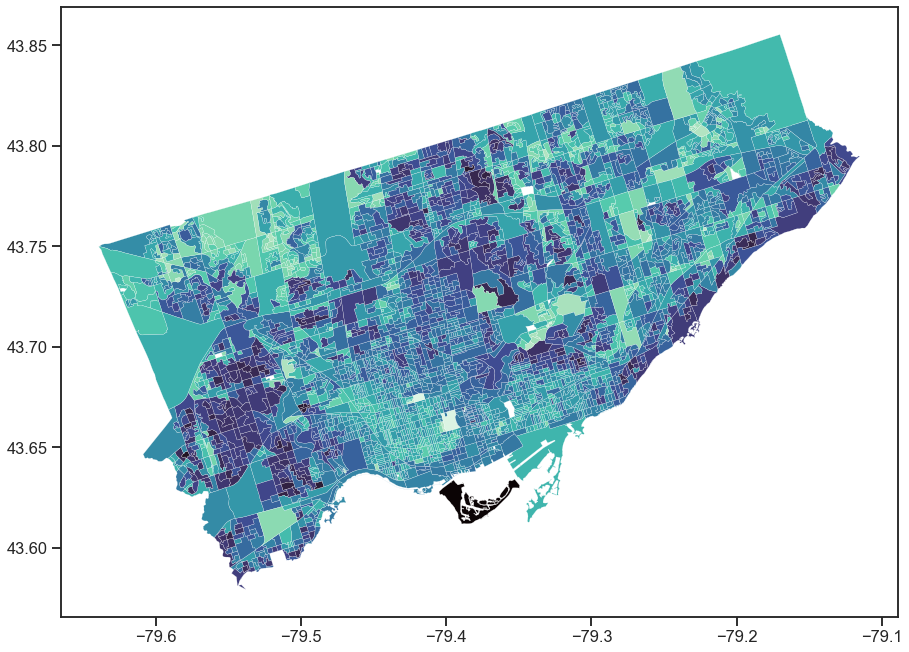

In [32]:
fig, ax = plt.subplots(figsize=(15,15))

ghg_map_to = ghg_map_gpd[ghg_map_gpd['DAUID'].astype('string').str[2:4].isin(['20'])]

ghg_map_to.cx[-79.62:-79.08, 43.57:43.86].plot('house_ghg_pp', ax=ax, cmap='mako_r', linewidth=0.2,)
plt.savefig('method_plot_b.svg')

Drawing individual DAs with mako colour for the construction draw

In [45]:
print(sns.color_palette('mako_r').as_hex())

['#8bdab2', '#40b7ad', '#348fa7', '#37659e', '#413d7b', '#2e1e3b']


c:\Users\Keagan Rankin\anaconda3\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
c:\Users\Keagan Rankin\anaconda3\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
c:\Users\Keagan Rankin\anaconda3\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


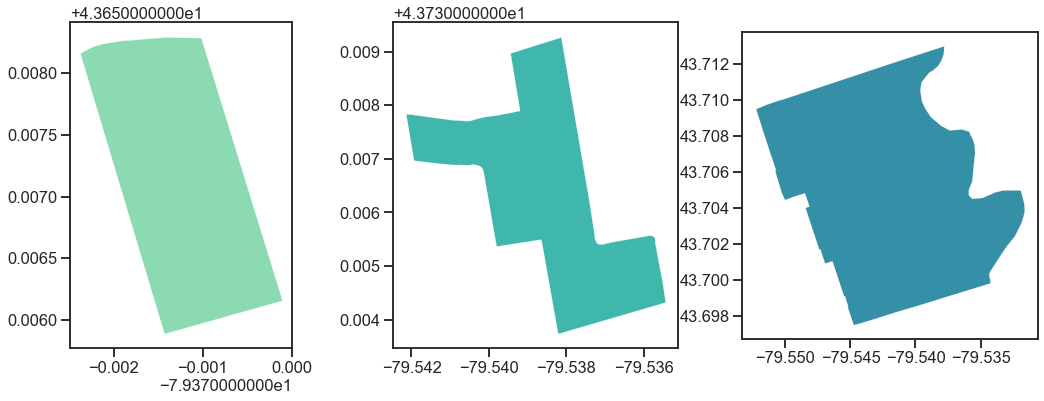

In [51]:
ghg_map_to.sample(3)

cs = ['#8bdab2', '#40b7ad', '#348fa7', '#37659e', '#413d7b', '#2e1e3b']

fig, ax = plt.subplots(1,3, figsize=(18,6))
g = ghg_map_to.sample(3)
for i, a in enumerate(ax.reshape(-1)):
    ghg_map_to.sample(1).plot('road_ghg_pp', ax=ax[i], color=cs[i], linewidth=0.2)

#plt.savefig('methods_plot_bc.svg')

## Find the best and worst neighbourhoods and plot
for visualization

In [10]:
from fig_package.fig_helper.helper import Helper
handy = Helper()
pop_da = pd.read_csv('C:/Users/Keagan Rankin/OneDrive - University of Toronto/Saxe - Rankin/Project 2. Housing Projections/FIG_Canada/data/houses/da_pop2021.csv').set_index('DAUID')
pop_da = pop_da[~pop_da.index.duplicated(keep='first')]
pop_da

,pop_2021
DAUID,
10010165,500.0
10010166,340.0
10010167,407.0
10010168,523.0
10010169,285.0
...,...
62080024,423.0
62080025,514.0
62080026,868.0


In [11]:
## Functions
def convert_ghg_megaton(res_df, pop_da):
    """
    Convert the results to absolute by multiplying
    by population, convert to tonnes from kg (e-3).
    res_df = results dataframe.
    ont_da = from Importer().
    """
    res_df = res_df.join(pop_da, on='DAUID')
    res_df['house_ghg'] = res_df['house_ghg_pp']*res_df['pop_2021']*10**-3
    res_df['road_ghg'] = res_df['road_ghg_pp']*res_df['pop_2021']*10**-3
    res_df['water_ghg'] = res_df['water_inf_ghg_pp']*res_df['pop_2021']*10**-3
    res_df = res_df.drop(['house_ghg_pp','road_ghg_pp','water_inf_ghg_pp'], axis=1)

    return res_df

In [12]:
samples_combined = pd.concat([p_samples[p].groupby('DAUID').median() for p in prov], axis=0)
samples_combined['total_ghg_pp'] = samples_combined.sum(axis=1)

In [13]:
#convert_ghg_megaton(samples_combined, pop_da)
samples_combined.sort_index()#.sort_values('total_ghg_pp', ascending=False)

,house_ghg_pp,road_ghg_pp,water_inf_ghg_pp,total_ghg_pp
DAUID,,,,
10010165,21847.296204,1810.835965,372.509491,24030.641661
10010166,23266.023940,1077.518353,268.269979,24611.812272
10010167,22113.372763,1053.595985,210.453065,23377.421813
10010168,23435.224346,1135.418890,286.205047,24856.848284
10010169,20631.410307,895.746718,211.202747,21738.359773
...,...,...,...,...
61060160,19564.863606,593.690496,328.322348,20486.876450
61060161,19371.120044,1994.380939,230.580267,21596.081250
61060162,20273.116793,1146.439620,453.877878,21873.434291


filter out the extreme road lengths as we did in the forcasting simulation

In [14]:
# Import raod data
p_name_full = ['newfoundland','nova_scotia','new_brunswick','pei','quebec',
               'ontario','manitoba','saskatchewan','alberta','british_columbia', 'nwt', 'yukon']

road_filt_all = []
for pnam in p_name_full: 
    rc = RoadClean(master='C:/Users/Keagan Rankin/')
    rc.province_name = pnam
    roads_clean = rc.full_road_clean_map()
    road_filt = roads_clean.groupby('DAUID').agg({'LENGTH_GEO':np.sum})
    road_filt = handy.drop_outliers_iqr(road_filt, 'LENGTH_GEO', f=3)
    
    road_filt_all.append(road_filt)

Cleaning road data...

Import-clean complete. Returning.
dropped:  55
Cleaning road data...


c:\Users\Keagan Rankin\OneDrive - University of Toronto\Saxe - Rankin\Project 2. Housing Projections\FIG_Canada\model\fig_package\fig_sample\road_clean_sample.py:50: DtypeWarning: Columns (10,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  province = pd.read_csv(self.path+road_file_name_map[province_name])



Import-clean complete. Returning.
dropped:  22
Cleaning road data...

Import-clean complete. Returning.
dropped:  29
Cleaning road data...

Import-clean complete. Returning.
dropped:  3
Cleaning road data...

Import-clean complete. Returning.
dropped:  918
Cleaning road data...

Import-clean complete. Returning.
dropped:  1937
Cleaning road data...

Import-clean complete. Returning.
dropped:  205
Cleaning road data...

Import-clean complete. Returning.
dropped:  341
Cleaning road data...

Import-clean complete. Returning.
dropped:  675
Cleaning road data...

Import-clean complete. Returning.
dropped:  496
Cleaning road data...

Import-clean complete. Returning.
dropped:  8
Cleaning road data...

Import-clean complete. Returning.
dropped:  2


c:\Users\Keagan Rankin\OneDrive - University of Toronto\Saxe - Rankin\Project 2. Housing Projections\FIG_Canada\model\fig_package\fig_sample\road_clean_sample.py:50: DtypeWarning: Columns (10,15,16,17,18,19,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  province = pd.read_csv(self.path+road_file_name_map[province_name])


In [15]:
pd.concat(road_filt_all)

,LENGTH_GEO
DAUID,
10010165,2047.151369
10010166,1427.099753
10010167,1659.946808
10010168,2303.229092
10010169,993.929234
...,...
60010293,278.312109
60010298,6957.133647
60010300,1419.809943


In [21]:
samples_combined_road_filt = pd.concat(road_filt_all).join(samples_combined).dropna()
samples_combined_road_filt.sort_values('total_ghg_pp', ascending=False).iloc[-100:-50]

,LENGTH_GEO,house_ghg_pp,road_ghg_pp,water_inf_ghg_pp,total_ghg_pp
DAUID,,,,,
24662418,583.960840,6839.922827,404.385739,100.256689,7344.565255
24660152,2173.224419,6470.003389,712.395382,145.638207,7328.036978
24610091,891.485310,6868.214017,371.867687,77.560428,7317.642132
59350459,1780.017792,5045.172946,1651.219192,601.773614,7298.165752
35204192,121.016437,7145.317275,68.628681,27.484215,7241.430171
24662419,47.180967,7116.073680,26.518496,74.385302,7216.977478
59170783,1083.275903,6066.211168,989.068033,131.553880,7186.833081
59152076,647.552481,6748.708948,338.809248,88.520948,7176.039143
35204935,0.429983,7110.037511,0.035501,11.338228,7121.411241


Find the highest and lowest ghg per person dessimination areas

In [146]:
import contextily as cx

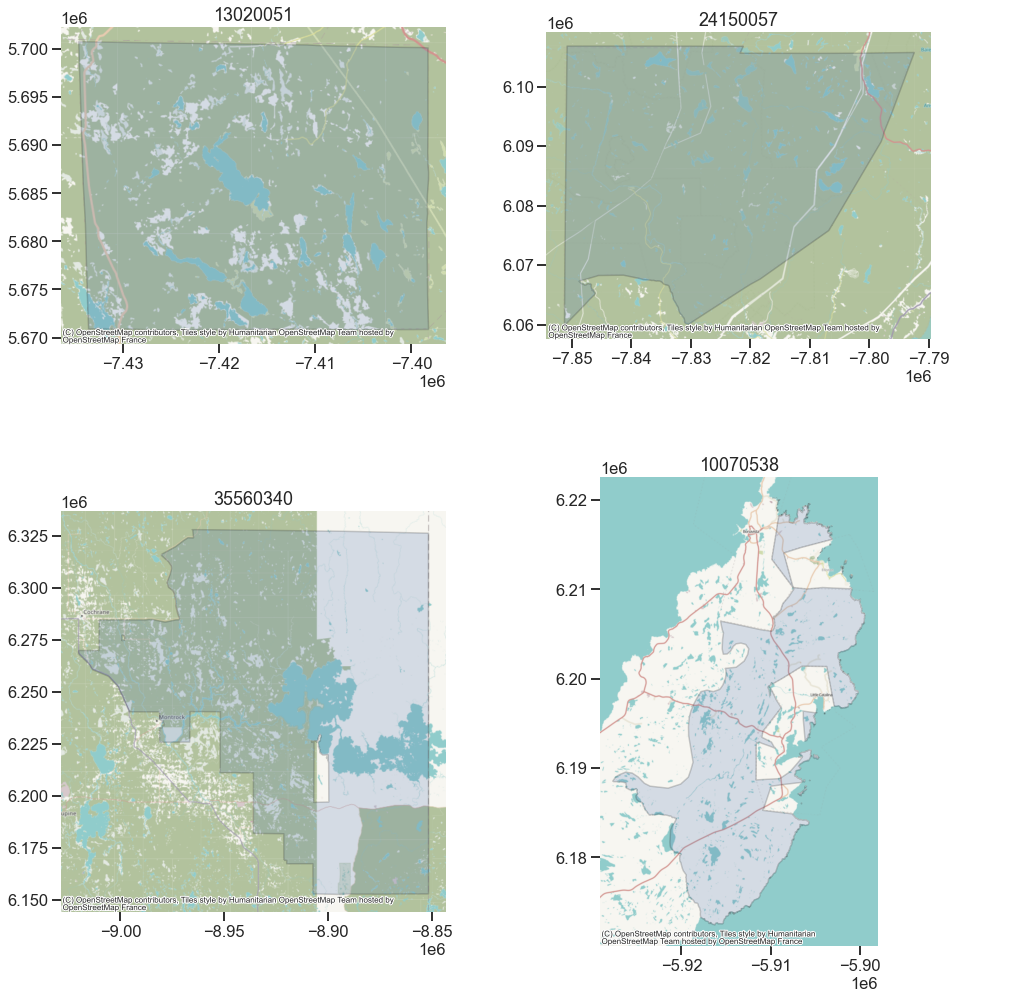

In [159]:
#all_prov_geo.set_index('DAUID').loc[[13020051,10100116,24150057, 13100277]].to_crs(4326)['geometry']
fig, ax = plt.subplots(2,2, figsize=(15,15))

worst = [13020051, 24150057, 13100277, 10070500, 48170210, 35560340, 10070538]
worst = [13020051, 24150057, 35560340, 10070538]
for i, a in enumerate(ax.reshape(-1)):
    all_prov_geo.set_index('DAUID').loc[[worst[i]],'geometry'].to_crs(3857).plot(ax=a, alpha=0.2, edgecolor="k")
    a.spines[['top','right','bottom','left']].set_visible(False)
    a.set_title(worst[i])
    cx.add_basemap(a)

plt.tight_layout()

In [27]:
worst = [13020051, 24150057, 35560340, 10070538]
all_prov_geo.set_index('DAUID').loc[worst].to_crs(4326)['geometry']

DAUID
13020051    POLYGON ((-66.58830 45.31294, -66.59304 45.312...
24150057    POLYGON ((-70.00126 47.99369, -70.00865 47.980...
35560340    POLYGON ((-79.51786 49.28908, -79.51788 49.250...
10070538    MULTIPOLYGON (((-53.08349 48.66873, -53.08358 ...
Name: geometry, dtype: geometry

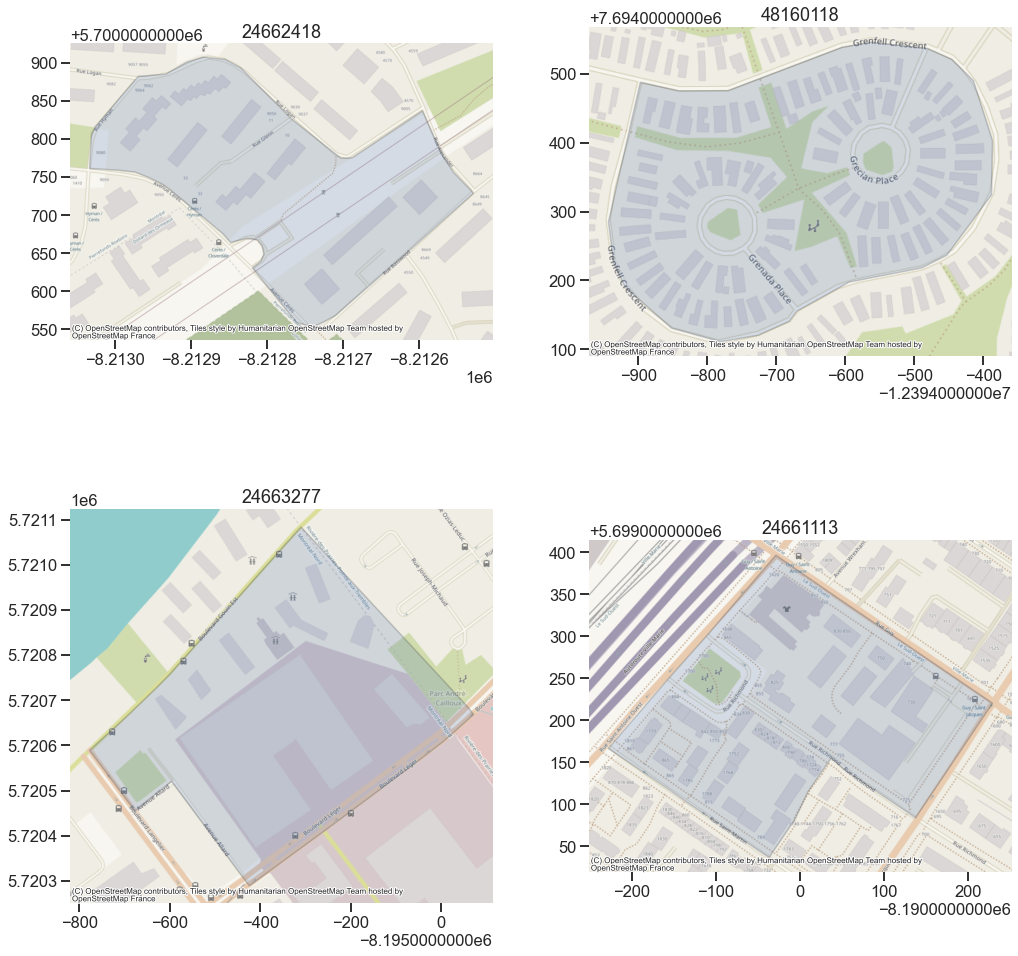

In [165]:
#all_prov_geo.set_index('DAUID').loc[[13020051,10100116,24150057, 13100277]].to_crs(4326)['geometry']
fig, ax = plt.subplots(2,2, figsize=(15,15))

best = [24662418, 48160118, 24663277, 24661113]
for i, a in enumerate(ax.reshape(-1)):
    all_prov_geo.set_index('DAUID').loc[[best[i]],'geometry'].to_crs(3857).plot(ax=a, alpha=0.2, edgecolor="k")
    a.spines[['top','right','bottom','left']].set_visible(False)
    a.set_title(best[i])
    cx.add_basemap(a)

plt.tight_layout()

In [28]:
best = [24662418, 48160118, 24663277, 24661113]
all_prov_geo.set_index('DAUID').loc[best].to_crs(4326)['geometry']

DAUID
24662418    POLYGON ((-73.77440 45.50092, -73.77517 45.500...
48160118    POLYGON ((-111.34476 56.67745, -111.34412 56.6...
24663277    POLYGON ((-73.61898 45.62486, -73.61926 45.624...
24661113    POLYGON ((-73.56997 45.49142, -73.57079 45.490...
Name: geometry, dtype: geometry